In [1]:
import numpy
from matplotlib import pyplot
import monte_carlo
import scipy.sparse
import scipy.linalg

## Including Transverse field

In [26]:
edges =  [((0,1),-1.0), ((1,2), -1.0), ((2,3), -1.0), ((3,4), -1.0), ((4, 0), -1.0)]
transverse = 1.0
nvars = 5

In [25]:
betas = [0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 20.0, 40.0]

In [4]:
q_transverse_data = numpy.zeros(len(betas))
q_energies_data = numpy.zeros(len(betas))
for i, beta in enumerate(betas):
    results = monte_carlo.run_transverse_quantum_monte_carlo(beta, 10000, 100, edges, nvars, transverse)
    energies, results = zip(*results)
    results = numpy.sum(numpy.asarray(results)*2 - 1, axis=-1)**2
    q_transverse_data[i] = numpy.mean(results, axis=0)
    q_energies_data[i] = numpy.mean(energies)

In [27]:
def make_ham_and_spin(nvars, edges, transverse):
    ham = numpy.zeros((2**nvars,2**nvars))
    for i in range(2**nvars):
        state = [(i >> j) & 1 for j in range(nvars)]
        h = 0.0
        for (vara, varb), j in edges:
            if state[vara] == state[varb]:
                h += j
            else:
                h -= j

        ham[i,i] += h
        for j in range(i+1, 2**nvars):
            b_state = [(j >> k) & 1 for k in range(nvars)]
            diffstate = [a^b for a,b in zip(state, b_state)]
            if sum(diffstate) != 1:
                continue
            for vark,s in enumerate(diffstate):
                if not s:
                    continue
                ham[i, j] = ham[i,j] + transverse
                ham[j, i] = ham[j,i] + transverse

    spin_diag = []
    for i in range(2**nvars):
        state = [(i >> j) & 1 for j in range(nvars)]
        spin_diag.append(numpy.sum(numpy.asarray(state)*2 - 1)**2)
    spin_op = numpy.diag(spin_diag)
    return ham, spin_op

ham, spin_op = make_ham_and_spin(nvars, edges, transverse)

In [28]:
ed_transverse_data = []
ed_transverse_energies = []
for beta in betas:
    expm = scipy.linalg.expm(-beta*ham)
    ed_transverse_data.append(numpy.trace(spin_op @ expm) / numpy.trace(expm))
    ed_transverse_energies.append(numpy.trace(ham @ expm) / numpy.trace(expm))

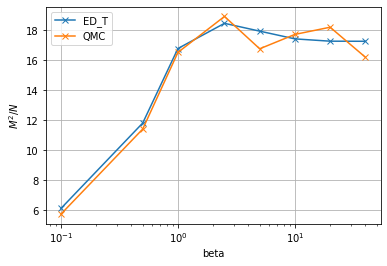

In [29]:
pyplot.plot(betas, ed_transverse_data, 'x-', label="ED_T")
pyplot.plot(betas, q_transverse_data, 'x-', label="QMC")
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("$M^2/N$")
pyplot.savefig("compare.png")
pyplot.show()

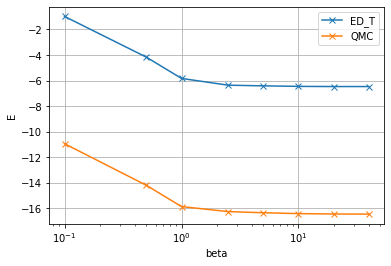

In [30]:
pyplot.plot(betas, ed_transverse_energies, 'x-', label="ED_T")
pyplot.plot(betas, q_energies_data, 'x-', label="QMC")
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("E")
pyplot.savefig("energies.png")
pyplot.show()

### Double checking that bump near $\beta = 2$

In [31]:
betas = 10**numpy.linspace(-2,2,50)

In [32]:
ed_transverse_data = []
ed_transverse_energies = []
for beta in betas:
    expm = scipy.linalg.expm(-beta*ham)
    ed_transverse_data.append(numpy.trace(spin_op @ expm) / numpy.trace(expm))

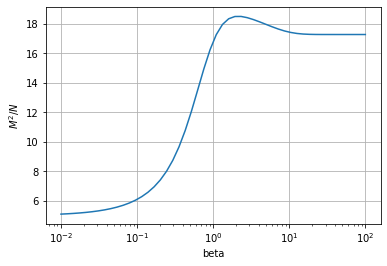

In [33]:
pyplot.plot(betas, ed_transverse_data)
pyplot.xscale('log')
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("$M^2/N$")
pyplot.show()

3 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 0), -1.0)]
4 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 0), -1.0)]
5 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 4), -1.0), ((4, 0), -1.0)]
6 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 4), -1.0), ((4, 5), -1.0), ((5, 0), -1.0)]
7 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 4), -1.0), ((4, 5), -1.0), ((5, 6), -1.0), ((6, 0), -1.0)]
8 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 4), -1.0), ((4, 5), -1.0), ((5, 6), -1.0), ((6, 7), -1.0), ((7, 0), -1.0)]
9 [((0, 1), -1.0), ((1, 2), -1.0), ((2, 3), -1.0), ((3, 4), -1.0), ((4, 5), -1.0), ((5, 6), -1.0), ((6, 7), -1.0), ((7, 8), -1.0), ((8, 0), -1.0)]


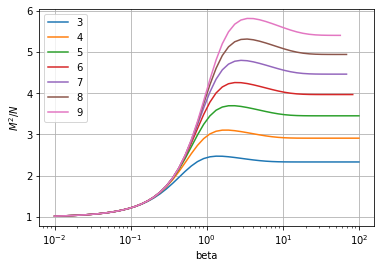

In [34]:
betas = 10**numpy.linspace(-2,2,50)
transverse = 1.0

dat = []

for nvars in range(3, 10):
    edges = [((v, v+1), -1.0) for v in range(nvars-1)] + [((nvars-1, 0), -1.0)]
    print(nvars, edges)
    
    ham, spin_op = make_ham_and_spin(nvars, edges, transverse)
    tmp_ed_transverse_data = []
    for beta in betas:
        expm = scipy.linalg.expm(-beta*ham)
        tmp_ed_transverse_data.append(numpy.trace(spin_op @ expm) / numpy.trace(expm) / nvars)
    dat.append(tmp_ed_transverse_data)
    pyplot.plot(betas, tmp_ed_transverse_data, label="{}".format(nvars))

pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("$M^2/N$")
pyplot.savefig("average_m_bump.png")
pyplot.show()

### Eigenstates of n=3

In [35]:
nvars = 3
edges = [((v, v+1), -1.0) for v in range(nvars-1)] + [((nvars-1, 0), -1.0)]
ham, spin_op = make_ham_and_spin(nvars, edges, transverse)
ham

array([[-3.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  1., -3.]])

In [36]:
ls, vs = numpy.linalg.eig(ham)
spin_expt = numpy.diag(vs.T @ (spin_op @ vs))/3
spin_expt

array([0.51196613, 1.        , 2.33333333, 2.82136721, 0.33333333,
       0.33518627, 0.33333333, 0.93053863])

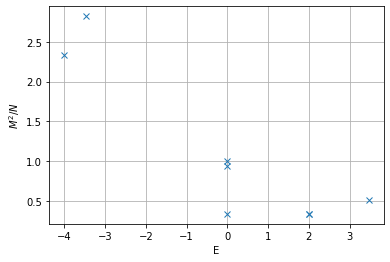

In [37]:
pyplot.plot(ls, spin_expt, 'x')
pyplot.xlabel("E")
pyplot.ylabel("$M^2/N$")
pyplot.grid()
pyplot.show()

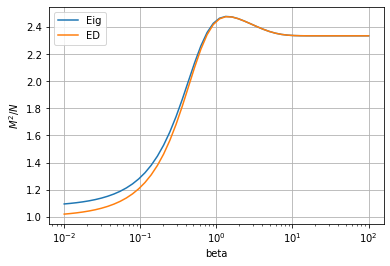

In [38]:
spin_heated_values = []
for beta in betas:
    z = numpy.sum(numpy.exp(-beta * ls))
    spin_heated = numpy.sum(numpy.exp(-beta * ls) * spin_expt) / z
    spin_heated_values.append(spin_heated)
pyplot.plot(betas, spin_heated_values, label="Eig")
pyplot.plot(betas, dat[0], label="ED")
pyplot.xscale('log')
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("$M^2/N$")
pyplot.legend()
pyplot.show()

Ok, guess it's real

### Varying H

/home/sumner/.virtualenvs/dwave/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


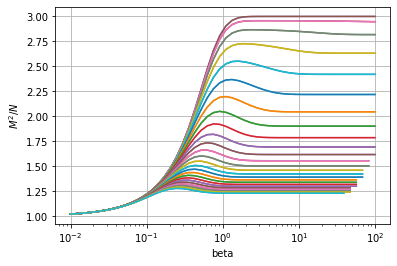

In [39]:
betas = 10**numpy.linspace(-2,2,50)
transverse = 1.0
nvars = 3
dat = []
edges = [((v, v+1), -1.0) for v in range(nvars-1)] + [((nvars-1, 0), -1.0)]
hs = numpy.linspace(-5,5,50)
for h in hs:    
    ham, spin_op = make_ham_and_spin(nvars, edges, h)
    tmp_ed_transverse_data = []
    for beta in betas:
        expm = scipy.linalg.expm(-beta*ham)
        tmp_ed_transverse_data.append(numpy.trace(spin_op @ expm) / numpy.trace(expm) / nvars)
    dat.append(tmp_ed_transverse_data)
    pyplot.plot(betas, tmp_ed_transverse_data)

pyplot.xscale('log')
pyplot.grid()
pyplot.xlabel("beta")
pyplot.ylabel("$M^2/N$")
pyplot.show()

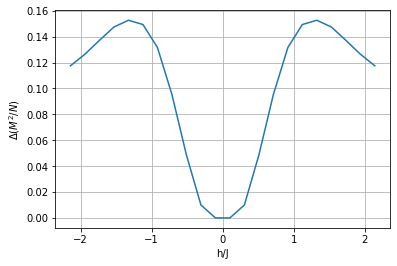

In [40]:
bump_size = [numpy.max(d) - d[-1] for d in dat]
pyplot.plot(hs, bump_size)
pyplot.grid()
pyplot.xlabel("h/J")
pyplot.ylabel("$\Delta(M^2/N)$")
pyplot.show()

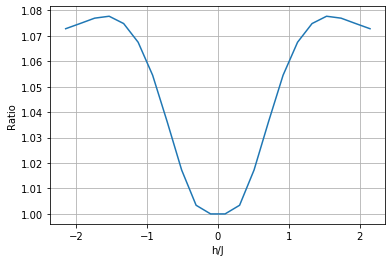

In [41]:
bump_ratio = [numpy.max(d) / d[-1] for d in dat]
pyplot.plot(hs, bump_ratio)
pyplot.grid()
pyplot.xlabel("h/J")
pyplot.ylabel("Ratio")
pyplot.show()

/home/sumner/.virtualenvs/dwave/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


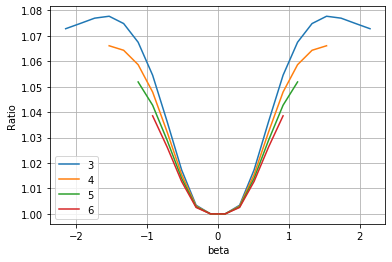

In [42]:
transverse = 1.0
nvars = 3
edges = [((v, v+1), -1.0) for v in range(nvars-1)] + [((nvars-1, 0), -1.0)]
hs = numpy.linspace(-5,5,50)

for nvars in range(3, 7):
    ratios = []
    for h in hs:    
        ham, spin_op = make_ham_and_spin(nvars, edges, h)
        tmp_ed_transverse_data = []
        for beta in betas:
            expm = scipy.linalg.expm(-beta*ham)
            tmp_ed_transverse_data.append(numpy.trace(spin_op @ expm) / numpy.trace(expm) / nvars)
        bump_ratio = numpy.max(tmp_ed_transverse_data) / tmp_ed_transverse_data[-1]
        ratios.append(bump_ratio)
    pyplot.plot(hs, ratios, label="{}".format(nvars))

pyplot.grid()
pyplot.legend()
pyplot.xlabel("beta")
pyplot.ylabel("Ratio")
pyplot.show()